# Avocado Dataset Visualizations (Python)

Goals:
* Explore the dataset to find out what kind of information is present
* Clean the data or change it's form in any way to make visualizations easier to interpret
* Create visualizations that paint a picture of the data provided in this dataset

### Loading the data & packages

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

avocados = pd.read_csv('avocado.csv')
pd.set_option('display.max_rows', None)
avocados.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Changing column names
It looks like there are a few columns with PLU numbers as their names. A quick Google search returned their description as small/med, large and extra large. So I will be changing the column names to that instead to make the data easier to read and understand.

In [158]:
# Renaming the columns 4046, 4225, 4770
avocados.rename(columns = {'4046':'small_med','4225':'large','4770':'extra_large'},inplace = True)

In [159]:
avocados.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
small_med       float64
large           float64
extra_large     float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

#### Creating a new column 'month' from the 'Date' column

In [160]:
avocados['month'] = pd.DatetimeIndex(avocados['Date']).month

### Overall nature of the dataset

In [161]:
avocados.shape

(18249, 15)

In [162]:
avocados.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
small_med       0
large           0
extra_large     0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

Very nice! We do not have to deal with any missing values!

In [163]:
avocados.describe()

,Unnamed: 0,AveragePrice,Total Volume,small_med,large,extra_large,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


#### Thoughts:
Looking at the average price, it looks like it has quite a big range. From almost 44 cents to 3.25 dollars! But most of the values (50%) fall in between 1.10 to 1.66. The total volume too has quite a big range and my initial thought is that because avocado is a seasonal food item. Maybe price too fluctuates as the season and volume changes? 

There are other columns that we still need to look into ('type' & 'region')

In [164]:
avocados['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [165]:
avocados['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [166]:
avocados['region'].nunique()

54

Looks like there are two types of avocados and 54 regions where they are sold. But some of the region names look like they are a culmination of many region together. For example, there are regions named 'TotalUS', 'West','SouthCentral', 'Southeast', and 'Northeast'. I will check if the data for these regions is indeed aggregated data.

In [167]:
avocados.loc[(avocados.region == 'TotalUS')]

,Unnamed: 0,Date,AveragePrice,Total Volume,small_med,large,extra_large,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
2652,0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS,12
2653,1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS,12
2654,2,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS,12
2655,3,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS,12
2656,4,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS,11
2657,5,2015-11-22,0.96,25114228.11,8571849.80,10389879.59,804662.83,5347835.89,4178583.45,1137229.84,32022.60,conventional,2015,TotalUS,11
2658,6,2015-11-15,0.92,28597756.27,9907981.27,11699787.51,815641.54,6174345.95,4854619.04,1283546.73,36180.18,conventional,2015,TotalUS,11
2659,7,2015-11-08,0.97,28485715.97,9991330.31,12199657.40,1143214.59,5151513.67,4058500.97,1027701.97,65310.73,conventional,2015,TotalUS,11
2660,8,2015-11-01,0.97,31047484.27,10138703.85,14229286.82,1410928.18,5268565.42,3966597.25,1246220.37,55747.80,conventional,2015,TotalUS,11
2661,9,2015-10-25,1.04,26240072.11,8683958.80,11410478.34,1188118.95,4957516.02,3918658.43,999727.70,39129.89,conventional,2015,TotalUS,10


#### Aggregated Data:
It looks like we do have aggregated data within the dataset for each given week and for each culmination of regions. This will be interesting data to look at because usally avocados need a warm climate to grow. Out of all the culmination of regions, the North East is a region that is not particularly warm. A quick Google search said that it isn't really possible to grow avocados in the North East becuase of the cold unless there are huge greenhouse farms. So will the North East have prices that are bit on the higher side because the avocados are not as readily available here? We will have to find out!

#### Recalculate the data's description:
This is because we need to get rid of the aggregated data rows. They are making our statistics of the data incorrect by essentially being data added twice.
* I will create a new table that holds all of these culminations of regions 
* The original table will be removed of these aggregated rows so that they can be just the city data

In [168]:
# Creating a new dataframe with just the aggregated data rows:
regionAvocado = avocados.loc[(avocados.region == 'West') |
                             (avocados.region == 'SouthCentral')|(avocados.region == 'Southeast')|
                            (avocados.region == 'Northeast')]
totalUS = avocados.loc[(avocados.region == 'TotalUS')]
regionAvocado.region.unique()

array(['Northeast', 'SouthCentral', 'Southeast', 'West'], dtype=object)

In [169]:
# Dropping the aggregated region rows:
avocados.drop(avocados[(avocados.region == 'TotalUS') | (avocados.region == 'West') |
                             (avocados.region == 'SouthCentral')|(avocados.region == 'Southeast')|
                            (avocados.region == 'Northeast')].index, inplace = True)

In [170]:
# Confirming that our avocados dataframe did change
avocados.shape

(16559, 15)

#### Dropping 'Unnamed' column:
It looks like the 'Unnamed' column is just a count of each week the data has been collected for. Since we have many other forms of dates in the dataset, I am going to remove this column. 

In [171]:
# Dropping 'Unnamed' column
avocados.drop(columns=avocados.columns[0], 
        axis=1, 
        inplace=True)

In [26]:
avocados.head()

,Date,AveragePrice,Total Volume,small_med,large,extra_large,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


## Understanding the data through visualizations:
The aim now will be to visually translate findings about this dataset. Everything that is interesting about this dataset must be shown through the various plots available. These plots could be relational plots showcasing the interesting relations or correlations between variables. Or they could even just be a simpler and more enriching way to gain a better understanding of the data. I will start with a simple histogram and density plot of the average prices of the two types of avocados. 

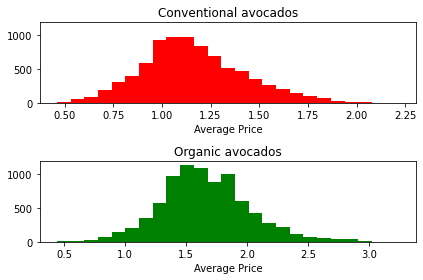

In [172]:
# plotting a histogram for the average prices of organic and conventional avocados
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
ax1.hist(x='AveragePrice', data = avocados[avocados['type']=='conventional'], bins = 25, color = 'red')
ax1.set_title('Conventional avocados')
ax1.set_xlabel('Average Price')
ax2.hist(x='AveragePrice', data = avocados[avocados['type']=='organic'], bins = 25, color = 'green')
ax2.set_title('Organic avocados')
ax2.set_xlabel('Average Price')
f.tight_layout()

Text(0.5, 0.98, 'Organic avocado density plot')

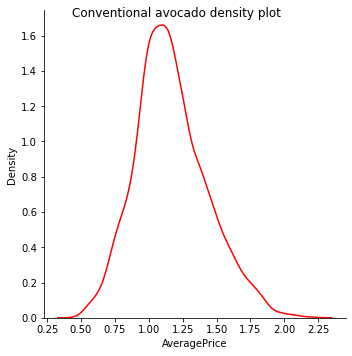

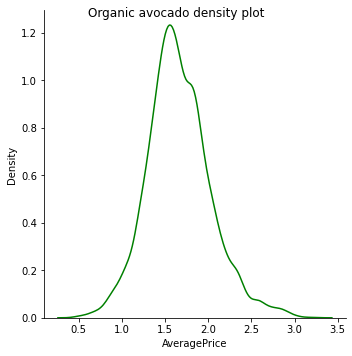

In [173]:
# Plotting a density plot (kde) for the two types of avocados
ax2 = sns.displot(conventional.AveragePrice, color = 'red', kind = 'kde')
ax2.fig.suptitle('Conventional avocado density plot')
ax1= sns.displot(organic.AveragePrice, color = 'Green', kind = 'kde')
ax1.fig.suptitle('Organic avocado density plot')


#### Histogram & Density plot insights:
From the historgrams and the density plots, it can clearly be seen that the distributions tend to be normal. Therefore we can even guess that the mean average price for organic avocados will be near the 1.50 to 1.60 range and the conventional avocados will be closer to 1.10 and 1.20

## Average Price Calculations:

In [174]:
# Another way to check out the prices of the two types of avocados would be to group the dataset by 'type' 
# and then take the average of the prices
avocados.groupby('type')['AveragePrice'].mean()

type
conventional    1.164902
organic         1.660922
Name: AveragePrice, dtype: float64

In [175]:
# Make bar graphs of the average prices of each region for each type of avocado
regionAvocado.groupby(['region','type']).agg(
{
    'AveragePrice':'mean',
    'Total Volume':'mean'
})

AveragePrice  Total Volume
region       type                                    
Northeast    conventional      1.344438  4.077247e+06
             organic           1.859408  1.433497e+05
SouthCentral conventional      0.869408  5.876693e+06
             organic           1.333077  1.072098e+05
Southeast    conventional      1.163018  3.581058e+06
             organic           1.633018  5.940625e+04
West         conventional      0.985089  6.209234e+06
             organic           1.559349  2.214116e+05

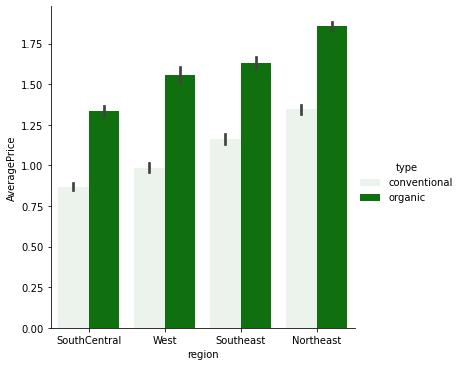

In [176]:
regionOrder = ['SouthCentral','West','Southeast','Northeast']
sns.catplot(x='region',y='AveragePrice', data=regionAvocado, kind = 'bar',
           order = regionOrder, hue ='type', color = 'green')

### Average price by region:
Remember how we thought that the Northeast region might have higher prices because it is a region where avocados can not be grown. It turns out that according to the data, Northeast region does have a greater average price than the other regions in the data set. Now this may or may not be because of the reason we thought of. We do not have the data to conclude that our reason is causing the prices to be so high in the Northeast region but it is still interesting to see that the Northeast region has the highest prices among the regions. 

### Volume by region:
Maybe another reason for the Northeast's high prices could be because they have a lower supply of avocados and therefore the retail stores there tend to price the avocados higher. Let's see how many of each type of avocados the regions consumed over the years provided.

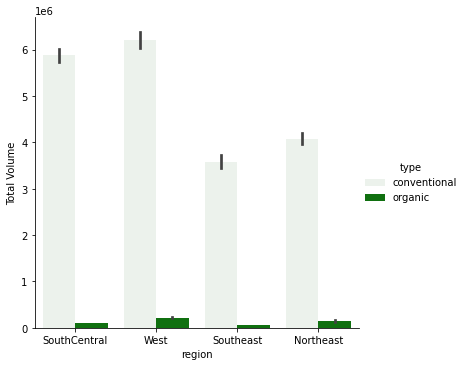

In [177]:
sns.catplot(x='region',y='Total Volume', data=regionAvocado, kind = 'bar',
           order = regionOrder, hue ='type', color = 'green')

We can see here that the Southcentral and West regions buy a lot more conventional avocados than the southeast and Northeast regions. The organic avocados tend to be low in all regions when compared to the conventional avocados. 

In [181]:
regionAvocado.groupby(['region','type'])['Total Volume'].sum()

region        type        
Northeast     conventional    6.890548e+08
              organic         2.422610e+07
SouthCentral  conventional    9.931612e+08
              organic         1.811846e+07
Southeast     conventional    6.051988e+08
              organic         1.003966e+07
West          conventional    1.049361e+09
              organic         3.741857e+07
Name: Total Volume, dtype: float64

### Boxplots:
Visualizing the different regions in boxplots will help get a better sense of the distribution of the data for these regions. For example, outliers in these regions will be easily seen and I can also see if there is any kind of skew as well.

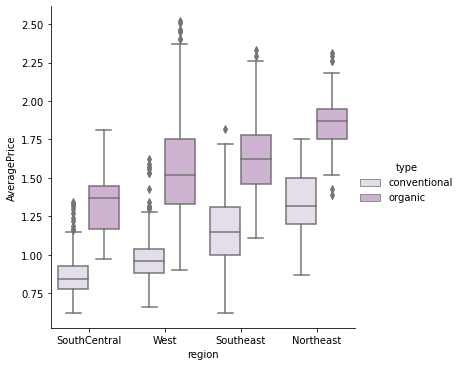

In [201]:
sns.set_palette('PuRd')
sns.catplot(x='region',y='AveragePrice',data=regionAvocado,kind='box', order = regionOrder, hue='type')

### Average price of the avocados from 2015 to 2018

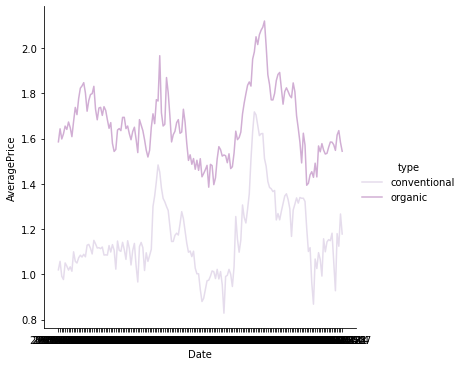

In [205]:
sns.relplot(x='Date',y='AveragePrice',data=avocados, kind = 'line',hue='type', ci = None)

#### Average price by year:

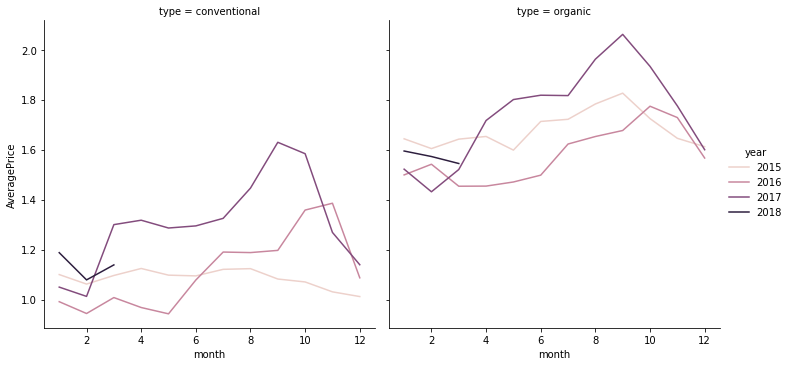

In [202]:
sns.relplot(x = 'month', y = 'AveragePrice', data = avocados,
           kind = 'line', hue = 'year', col = 'type', ci = None)
plt.show()

#### Insight:
We can see that the prices in the year 2017 are much higher as compared to the other years. The price started off low for 2017 and grew very high towards the latter stages of the year. Did something happen towards the end of 2017 that caused such huge increase in prices for both types of avocados? Was there a shortage of avocados in the latter months of 2017? Interesting!

#### Shortage of avocados?
Let us look at this through a histogram for each year broken down by months:

In [14]:
avocados['month'] = avocados['month'].astype('category')

[]

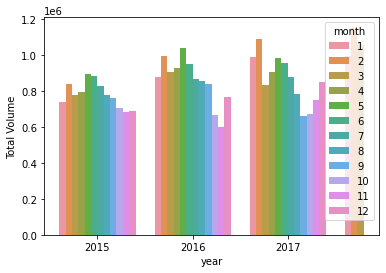

In [15]:
sns.barplot(data = avocados, y = 'Total Volume', x = 'year', hue = 'month', ci = None)
plt.plot()

#### Insights:
Comparing the volumes of avocados at the end of each of the years, it does not look like there is that much of a difference. 

### Boxplot for the average price by region

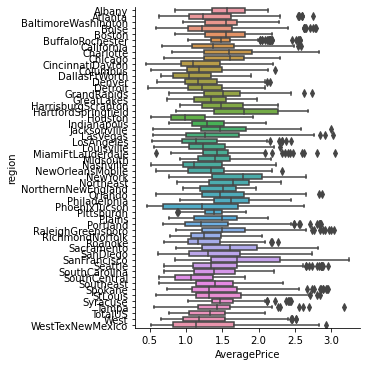

<Figure size 7200x1800 with 0 Axes>

In [29]:
sns.catplot(x = 'AveragePrice', y = 'region', data=avocados, kind = 'box')
plt.figure(figsize = (100,25))
plt.show()